### Sentiment Analysis :

In [1]:
# Importing libraries and dependencies :
import nltk
import pandas as pd
from newsapi import NewsApiClient
from dotenv import load_dotenv
import os
from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [2]:
# Making tyhe analyzer object :
analyzer =SentimentIntensityAnalyzer()

In [3]:
load_dotenv()

True

In [4]:
# Setting the api:
api = os.getenv('NEWS_KEY_API')

In [5]:
api_news = NewsApiClient(api)

In [6]:
# Function for getting the news articles and the sentiment score:
def fetch_articles(x):
    crytpo_news = []
    crypto = api_news.get_everything(x,language='en')
    for i in crypto['articles']:
        try:
            date = i['publishedAt'][:10]
            text = i['content']
            sentiment_score = analyzer.polarity_scores(text)
            compound = sentiment_score['compound']
            pos = sentiment_score['pos']
            neu = sentiment_score['neu']
            neg = sentiment_score['neg']
            
            crytpo_news.append({'date':date,
                                'text' : text,
                                'coumpound':compound,
                                'pos':pos,
                                'neu':neu,
                                'neg':neg})
                                
            
            
        except AttributeError:
            pass
        crypto_score = pd.DataFrame(crytpo_news)
        crypto_score.index = crypto_score['date']
        crypto_score = crypto_score.drop(columns = ['date','text'])
        
            
    
    return crypto_score

In [7]:
# Fetching the articles :
bitcoin_score = fetch_articles('Bitcoin')
# Max Negative for 'bitcoin':
bitcoin_score.neg.max()

0.3

In [8]:
# Max Positive for 'bitcoin' :
bitcoin_score.pos.max()

0.202

In [9]:
# Descriptive statistics:
bitcoin_score.describe()

,coumpound,pos,neu,neg
count,20.000000,20.000000,20.000000,20.00000
mean,-0.093390,0.059450,0.860050,0.08045
std,0.389782,0.062439,0.104336,0.07613
min,-0.859300,0.000000,0.557000,0.00000
25%,-0.366350,0.000000,0.827000,0.05350
50%,-0.190100,0.048000,0.888000,0.06300
75%,0.152575,0.085000,0.930250,0.08425
max,0.750600,0.202000,0.964000,0.30000


In [10]:
# Fetching data for 'ethereum' :
etherem_score = fetch_articles('Ethereum')
# Max negative sentiment score for 'ethereum' :
etherem_score.neg.max()

0.178

In [11]:
# Max positive sentiment score for 'ethereum' :
etherem_score.pos.max()

0.178

#####  Answer 1: According to the above calculations 'Bitcoin' had the highest mean score.
##### Answer 2: Highest Negative score associated witht the data used was registered by 'Bitcoin'.
##### Answer 3: The highest positive score assocaited with the data was registered by 'Ethereum'.

### Natural Language Processing:

In [12]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer ,PorterStemmer
from string import punctuation
from nltk.util import ngrams 
import re
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [13]:
# Function to retrive news about a coin:
def get_articles(x):
    crypto = api_news.get_everything(x,language='en')
    return crypto
# Function for getting all articles in one big article:
def bag_words(data):
    crypto_content=[]
    for i in data['articles']:
        crypto_content.append(i['content'])
    return ' '.join(crypto_content)
# Functioin to tokenize article:
def tokenize(data):
    sw = set(stopwords.words('english'))
    regex = re.compile('[^a-zA-Z ]')
    lemmatizer = WordNetLemmatizer()
    # data_sent =[sent_tokenize(i) for i in data]
    data_clean =regex.sub('',str(data))
    data_tokenize = word_tokenize(data_clean)
    data_lemmatize = [lemmatizer.lemmatize(i) for i in data_tokenize]
    output = [i.lower() for i in data_lemmatize if i.lower() not in sw]
    return list(output)
# Function to count the most common words:
def word_count(output):
    count = (Counter(output))
    df = pd.DataFrame.from_dict(count.most_common(10))
    df = df.rename(columns={0:'words',1:'count'})
    return df

In [14]:
bitcoin_news = get_articles('Bitcoin')
bitcoin_article =bag_words(bitcoin_news)
bit_tokenized = tokenize(bitcoin_article)
bit_words = word_count(bit_tokenized)
bit_words

,words,count
0,char,19
1,bitcoin,13
2,cryptocurrency,13
3,world,7
4,ha,5
5,week,5
6,reuters,5
7,investor,4
8,dropped,4
9,may,4


In [15]:
ethereum_news = get_articles('Ethereum')
ethereum_article = bag_words(ethereum_news)
ethereum_tokenized = tokenize(ethereum_article)
ethereum_words = word_count(ethereum_tokenized)
ethereum_words

,words,count
0,char,20
1,cryptocurrency,10
2,bitcoin,8
3,ha,7
4,world,7
5,may,6
6,ethereum,5
7,biggest,5
8,reuters,5
9,last,5


In [16]:
type(bit_tokenized)

list

In [17]:
def n_gram(tokenized_data):
    bigram = ngrams(tokenized_data,2)
    joined_output = ['_'.join(i) for i in bigram]
    return ' '.join(joined_output)

In [18]:
# Word Cloud for 'bitcoin' :
bit_bigram = n_gram(bit_tokenized)

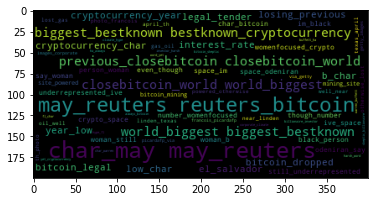

In [19]:
wc_bitcoin = WordCloud().generate(bit_bigram)
plt.imshow(wc_bitcoin)

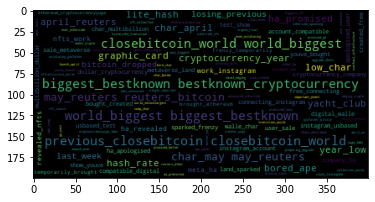

In [20]:
# Word Cloud for ethereum bigrams :
eth_bigram = n_gram(ethereum_tokenized)
wc_ethereum = WordCloud().generate(eth_bigram)
plt.imshow(wc_ethereum)

### Number Entity Recognition :

In [21]:
# Importing necessary libraries for NER:
import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_sm')

In [29]:
# Named Entity Recognition in Bitcoin article :
doc = nlp(bitcoin_article)

In [24]:
displacy.render(doc,style='ent')

In [28]:
# Named Entity Tagging in ethereum articles:
ethereum_doc = nlp(ethereum_article)

In [27]:
displacy.render(ethereum_doc,style='ent')